### Analyzing CIA Factbook Data Using SQLite and Python

#### In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:
- population - The population as of 2015.
- population_growth - The annual population growth rate, as a percentage.
- area - The total land and water area.

#### You may be wondering why we're using SQLite at all if we're just reading in the results into pandas dataframes anyway. Why not just use pandas? First, most data analysts and data scientists in the industry use a SQL GUI based tool, which:
- let you write queries and save them for later
- let you run queries against multiple enterprise database systems (MySQL, Postgres, etc.)
- return results as a table
- create standard visualizations like line charts, bar plots, and histograms from the results table without any programming

#### We're using pandas and matplotlib to display results neatly and visualize them because they let us focus on practicing thinking and working in SQL. You'll spend most of your time in SQL in this guided project and will inteface with pandas and matplotlib minimally.



In [7]:
# Import pandas and sqlite3
import sqlite3
import pandas as pd

In [8]:
# Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
q1 = "SELECT * FROM sqlite_master WHERE type='table'";
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [9]:
#  returns the first 5 rows of the facts table in the database
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [10]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


#### Here are the descriptions for some of the columns:
   - name - The name of the country.
   - area - The total land and sea area of the country.
   - population - The country's population.
   - population_growth- The country's population growth as a percentage.
   - birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
   - death_rate - The country's death rate, or the number of death a year per 1,000 people.
   - area- The country's total area (both land and water).
   - area_land - The country's land area in square kilometers.
   - area_water - The country's waterarea in square kilometers.


In [11]:
# query minimum population, maximum population
# minimum population growth, maximum population growth
q3 = '''
select min(population) min_pop, max(population) max_pop, 
min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


#### A few things stick out from the summary statistics in the last screen:
   - there's a country with a population of 0
   - there's a country with a population of 7256490011 (or more than 7.2 billion people)
   
#### Let's zoom in on just these countries.

In [13]:
# query the countrie(s) with a population of 0
q4 = '''
select *
from facts
where population == (select min(population) from facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [14]:
# query the countrie(s) with a population of 7256490011
q5 = '''
select *
from facts
where population == (select max(population) from facts);
'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


#### It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0.

#### Let's move on to generating histograms for the rest of the countries in the table, ignoring these 2 rows. We want to write a query that returns all of the values in the columns you want to visualize. Once the results table is represented as a dataframe, you can use the pd.DataFrame.hist() method to generate histograms for all of the columns.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7003225ef0>,
      dtype=object)

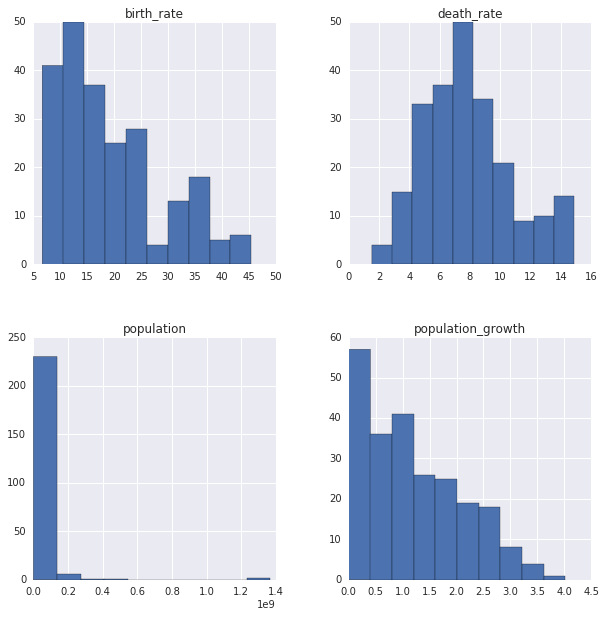

In [15]:
# Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:
# population
# population_growth
# birth_rate
# death_rate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

#### Which countries have the highest population density? Population density is the ratio of population to land area.

In [16]:
q7 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q7, conn).head()

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70007a8dd8>]],
      dtype=object)

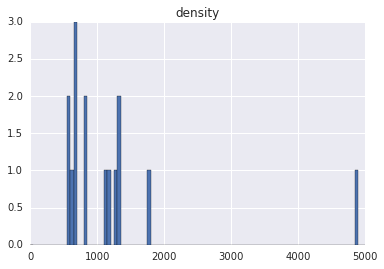

In [20]:
# Generate a histogram of population densities
pd.read_sql_query(q7, conn).hist(range=(0, 5000), bins=100)

#### Here are some next steps for you to explore: Which countries have the highest ratios of water to land? Which countries have more water than land?